# Without Unknown Craton

In [58]:
#pip install xgboost

In [59]:
#pip install --upgrade xgboost

In [60]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings('ignore')

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, r2_score, make_scorer, f1_score, recall_score, precision_score
from sklearn.model_selection import GridSearchCV

import seaborn as sns
import matplotlib.pyplot as plt

import pickle

In [61]:
ls

2020Diamind_XZ_1206.csv             Diamonds_Impute_XGboost_CV.ipynb
2020Diamind_XZ_1208.csv             Diamonds_XGboost_CV.ipynb
2020Diamind_XZ_1210.csv             Diamonds_XGboost_CV_noUnknow.ipynb
2020Diamind_XZ_1210_allknown.csv


In [62]:
df_raw = pd.read_csv("2020Diamind_XZ_1210_allknown.csv")
df_raw.head()

,Unnamed: 0,craton,Si,Ti,Al,Cr,V,Mn,Mg,Ca,Sr,Ba,Na,P,K,Fe,Co,Ni,S,Zn,Cr_trace,Co_trace,Ni_trace,Sr_trace,Y_trace,Zr_trace,Nb_trace,Ba_trace,La_trace,Ce_trace,Nd_trace,Sm_trace,Eu_trace,Dy_trace,Er_trace,Yb_trace,Ti_trace,Fe_trace,Al_trace,Ca_trace,Mn_trace,Mg_trace,NAs
0,1,Guyana,0.000,30.354,0.008,0.027,0.0,0.364,0.270,0.017,0.0,0.0,0.024,0.0,0.027,37.022,0.0,0.038,0.0,0.0,260.0,56.0,181.0,0.2,0.300,27.4,335.0,4.00,0.600,2.100,0.60,0.192,0.076,0.147,0.224,0.100,NaN,NaN,NaN,55.640,3251.0,NaN,48
1,2,Guyana,0.014,32.008,0.048,0.027,0.0,0.395,0.342,0.029,0.0,0.0,0.024,0.0,0.033,33.281,0.0,0.094,0.0,0.0,4172.0,429.0,6375.0,0.4,0.800,56.6,227.0,3.20,0.700,2.400,2.50,0.312,0.111,0.129,0.392,0.328,NaN,NaN,NaN,97.424,1887.0,NaN,48
2,3,Guyana,0.070,0.689,1.138,2.155,0.0,0.201,29.868,0.017,0.0,0.0,0.024,0.0,0.027,36.369,0.0,0.809,0.0,0.0,2944.0,155.0,790.0,1.6,0.144,25.2,4.8,0.56,0.096,0.056,0.32,0.400,0.160,0.320,0.640,0.320,NaN,NaN,NaN,156.800,2397.0,NaN,48
3,4,Guyana,0.005,30.102,0.008,0.027,0.0,0.565,0.072,0.021,0.0,0.0,0.024,0.0,0.027,35.941,0.0,0.038,0.0,0.0,153.0,53.0,13.0,0.2,0.300,348.7,646.0,2.30,0.500,1.900,0.70,0.300,0.069,0.186,0.248,0.154,NaN,NaN,NaN,71.488,2898.0,NaN,48
4,5,Guyana,0.028,32.464,0.069,0.027,0.0,0.325,0.300,0.017,0.0,0.0,0.024,0.0,0.027,31.290,0.0,0.055,0.0,0.0,NaN,NaN,NaN,0.3,0.500,68.7,205.0,8.80,0.800,2.900,0.70,0.100,0.000,0.100,0.256,0.500,NaN,NaN,NaN,67.304,NaN,NaN,53


### Data Preprocessing

In [63]:
#df_raw['Method（主量）'].unique()

In [64]:
#df_raw['Comment（Inclusion/Sulfide）'].unique()

In [65]:
df = df_raw.copy()
df.shape

(1246, 43)

In [66]:
df.columns #Keep NA to see NA's impact

Index(['Unnamed: 0', 'craton', 'Si', 'Ti', 'Al', 'Cr', 'V', 'Mn', 'Mg', 'Ca',
       'Sr', 'Ba', 'Na', 'P', 'K', 'Fe', 'Co', 'Ni', 'S', 'Zn', 'Cr_trace',
       'Co_trace', 'Ni_trace', 'Sr_trace', 'Y_trace', 'Zr_trace', 'Nb_trace',
       'Ba_trace', 'La_trace', 'Ce_trace', 'Nd_trace', 'Sm_trace', 'Eu_trace',
       'Dy_trace', 'Er_trace', 'Yb_trace', 'Ti_trace', 'Fe_trace', 'Al_trace',
       'Ca_trace', 'Mn_trace', 'Mg_trace', 'NAs'],
      dtype='object')

In [67]:
df.drop(df.columns[df.isna().mean() == 1], axis=1, inplace=True)  # Remove columns that 100% missing 
df.shape

(1246, 43)

In [68]:
#df.drop(['Unnamed: 0', 'ID', 'DOI', 'Reference', 'location', 'location comment', 'location',  'GPS Location',
        # 'Diamond_Method', 'Inclusion_Method', 'sample', 'mineral（Diamond/Inclusion/Sulfide）', 
       # 'Method（主量）', 'Comment（Inclusion/Sulfide）'], 
       # axis = 1, inplace=True)
#df.shape

In [69]:
df=df.drop(df.columns[0], axis=1)

In [70]:
df=df.drop('NAs', axis=1)

In [71]:
df.head()

,craton,Si,Ti,Al,Cr,V,Mn,Mg,Ca,Sr,Ba,Na,P,K,Fe,Co,Ni,S,Zn,Cr_trace,Co_trace,Ni_trace,Sr_trace,Y_trace,Zr_trace,Nb_trace,Ba_trace,La_trace,Ce_trace,Nd_trace,Sm_trace,Eu_trace,Dy_trace,Er_trace,Yb_trace,Ti_trace,Fe_trace,Al_trace,Ca_trace,Mn_trace,Mg_trace
0,Guyana,0.000,30.354,0.008,0.027,0.0,0.364,0.270,0.017,0.0,0.0,0.024,0.0,0.027,37.022,0.0,0.038,0.0,0.0,260.0,56.0,181.0,0.2,0.300,27.4,335.0,4.00,0.600,2.100,0.60,0.192,0.076,0.147,0.224,0.100,NaN,NaN,NaN,55.640,3251.0,NaN
1,Guyana,0.014,32.008,0.048,0.027,0.0,0.395,0.342,0.029,0.0,0.0,0.024,0.0,0.033,33.281,0.0,0.094,0.0,0.0,4172.0,429.0,6375.0,0.4,0.800,56.6,227.0,3.20,0.700,2.400,2.50,0.312,0.111,0.129,0.392,0.328,NaN,NaN,NaN,97.424,1887.0,NaN
2,Guyana,0.070,0.689,1.138,2.155,0.0,0.201,29.868,0.017,0.0,0.0,0.024,0.0,0.027,36.369,0.0,0.809,0.0,0.0,2944.0,155.0,790.0,1.6,0.144,25.2,4.8,0.56,0.096,0.056,0.32,0.400,0.160,0.320,0.640,0.320,NaN,NaN,NaN,156.800,2397.0,NaN
3,Guyana,0.005,30.102,0.008,0.027,0.0,0.565,0.072,0.021,0.0,0.0,0.024,0.0,0.027,35.941,0.0,0.038,0.0,0.0,153.0,53.0,13.0,0.2,0.300,348.7,646.0,2.30,0.500,1.900,0.70,0.300,0.069,0.186,0.248,0.154,NaN,NaN,NaN,71.488,2898.0,NaN
4,Guyana,0.028,32.464,0.069,0.027,0.0,0.325,0.300,0.017,0.0,0.0,0.024,0.0,0.027,31.290,0.0,0.055,0.0,0.0,NaN,NaN,NaN,0.3,0.500,68.7,205.0,8.80,0.800,2.900,0.70,0.100,0.000,0.100,0.256,0.500,NaN,NaN,NaN,67.304,NaN,NaN


In [72]:
df.craton.value_counts()

Siberia        580
Kaapvaal       164
Slave          160
Congo          128
West Africa     88
Guyana          60
Amazonia        59
Kalahari         4
Africa           3
Name: craton, dtype: int64

In [73]:
df.craton.nunique()

9

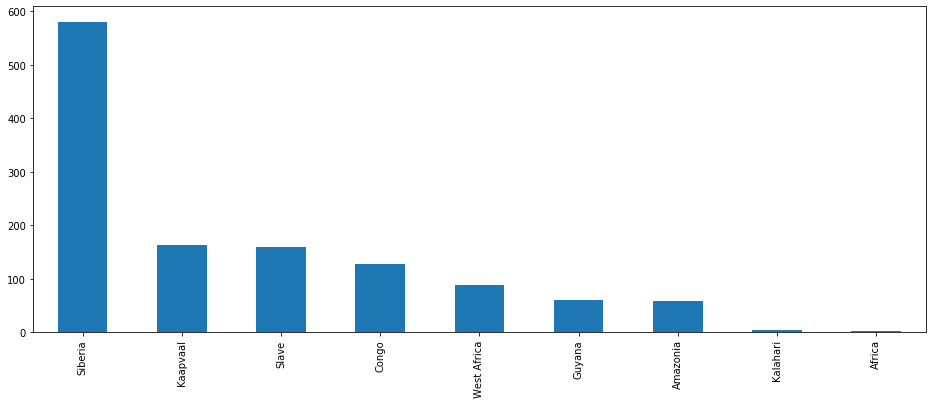

In [74]:
plt.figure(figsize=(16, 6))
df.craton.value_counts().plot(kind = 'bar')

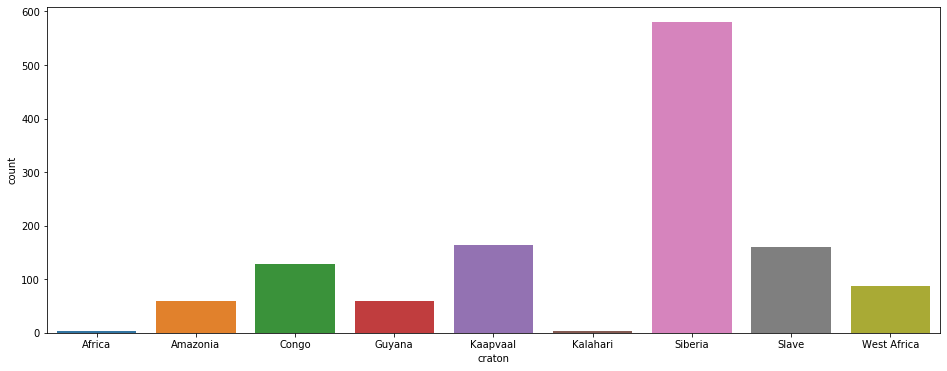

In [134]:
plt.figure(figsize=(16, 6))
sns.countplot(df.craton)

In [75]:
#df.craton = le.fit_transform(df.craton.astype(str))
df.craton=df.craton.astype('category')

In [76]:
df.craton.nunique()
df.craton.value_counts()

Siberia        580
Kaapvaal       164
Slave          160
Congo          128
West Africa     88
Guyana          60
Amazonia        59
Kalahari         4
Africa           3
Name: craton, dtype: int64

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1246 entries, 0 to 1245
Data columns (total 41 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   craton    1246 non-null   category
 1   Si        1092 non-null   float64 
 2   Ti        1092 non-null   float64 
 3   Al        1092 non-null   float64 
 4   Cr        1092 non-null   float64 
 5   V         948 non-null    float64 
 6   Mn        1085 non-null   float64 
 7   Mg        1092 non-null   float64 
 8   Ca        1092 non-null   float64 
 9   Sr        933 non-null    float64 
 10  Ba        940 non-null    float64 
 11  Na        1085 non-null   float64 
 12  P         1011 non-null   float64 
 13  K         1091 non-null   float64 
 14  Fe        1092 non-null   float64 
 15  Co        933 non-null    float64 
 16  Ni        1058 non-null   float64 
 17  S         933 non-null    float64 
 18  Zn        933 non-null    float64 
 19  Cr_trace  681 non-null    float64 
 20  Co_trace

### Split data into craton and elements

In [78]:
cratons = df.craton.values
cratons=cratons.astype('str')
cratons

array(['Guyana', 'Guyana', 'Guyana', ..., 'Africa', 'Africa', 'Africa'],
      dtype='<U11')

In [79]:
le = LabelEncoder()
cratons = le.fit_transform(cratons)
cratons

array([3, 3, 3, ..., 0, 0, 0])

In [80]:
features = df.drop(['craton'], axis=1)
features.shape

(1246, 40)

In [81]:
features.head()

,Si,Ti,Al,Cr,V,Mn,Mg,Ca,Sr,Ba,Na,P,K,Fe,Co,Ni,S,Zn,Cr_trace,Co_trace,Ni_trace,Sr_trace,Y_trace,Zr_trace,Nb_trace,Ba_trace,La_trace,Ce_trace,Nd_trace,Sm_trace,Eu_trace,Dy_trace,Er_trace,Yb_trace,Ti_trace,Fe_trace,Al_trace,Ca_trace,Mn_trace,Mg_trace
0,0.000,30.354,0.008,0.027,0.0,0.364,0.270,0.017,0.0,0.0,0.024,0.0,0.027,37.022,0.0,0.038,0.0,0.0,260.0,56.0,181.0,0.2,0.300,27.4,335.0,4.00,0.600,2.100,0.60,0.192,0.076,0.147,0.224,0.100,NaN,NaN,NaN,55.640,3251.0,NaN
1,0.014,32.008,0.048,0.027,0.0,0.395,0.342,0.029,0.0,0.0,0.024,0.0,0.033,33.281,0.0,0.094,0.0,0.0,4172.0,429.0,6375.0,0.4,0.800,56.6,227.0,3.20,0.700,2.400,2.50,0.312,0.111,0.129,0.392,0.328,NaN,NaN,NaN,97.424,1887.0,NaN
2,0.070,0.689,1.138,2.155,0.0,0.201,29.868,0.017,0.0,0.0,0.024,0.0,0.027,36.369,0.0,0.809,0.0,0.0,2944.0,155.0,790.0,1.6,0.144,25.2,4.8,0.56,0.096,0.056,0.32,0.400,0.160,0.320,0.640,0.320,NaN,NaN,NaN,156.800,2397.0,NaN
3,0.005,30.102,0.008,0.027,0.0,0.565,0.072,0.021,0.0,0.0,0.024,0.0,0.027,35.941,0.0,0.038,0.0,0.0,153.0,53.0,13.0,0.2,0.300,348.7,646.0,2.30,0.500,1.900,0.70,0.300,0.069,0.186,0.248,0.154,NaN,NaN,NaN,71.488,2898.0,NaN
4,0.028,32.464,0.069,0.027,0.0,0.325,0.300,0.017,0.0,0.0,0.024,0.0,0.027,31.290,0.0,0.055,0.0,0.0,NaN,NaN,NaN,0.3,0.500,68.7,205.0,8.80,0.800,2.900,0.70,0.100,0.000,0.100,0.256,0.500,NaN,NaN,NaN,67.304,NaN,NaN


In [82]:
features.columns

Index(['Si', 'Ti', 'Al', 'Cr', 'V', 'Mn', 'Mg', 'Ca', 'Sr', 'Ba', 'Na', 'P',
       'K', 'Fe', 'Co', 'Ni', 'S', 'Zn', 'Cr_trace', 'Co_trace', 'Ni_trace',
       'Sr_trace', 'Y_trace', 'Zr_trace', 'Nb_trace', 'Ba_trace', 'La_trace',
       'Ce_trace', 'Nd_trace', 'Sm_trace', 'Eu_trace', 'Dy_trace', 'Er_trace',
       'Yb_trace', 'Ti_trace', 'Fe_trace', 'Al_trace', 'Ca_trace', 'Mn_trace',
       'Mg_trace'],
      dtype='object')

In [83]:
def plot_importance(feature_df, model, n_feature):
    '''
    Input:
        feature_df: The feature dataframe / The X_train with column names
        model: The training model
        n_feature: number of feature importance you want to display
    Output:
        A plot with the top n feature importance in decreasing order
    '''
    vals = model.feature_importances_
    df = pd.DataFrame(vals, index=feature_df.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)
    df_n = df.iloc[:n_feature,]
    plt.figure(figsize=(16, 9))
    plt.bar(df_n.index, df_n.Importance)
    plt.xticks(rotation=90)

In [84]:
def print_results(y_true, y_pred, dataset):
    print(dataset,'-- R2: {0}, Accuracy Score: {1}'.format(r2_score(y_true, y_pred), 
                                                              accuracy_score(y_true, y_pred)))

### Split into training set and test set

In [85]:
X_train, X_test, y_train, y_test = train_test_split(features, cratons, test_size=0.2, 
                                                    stratify = cratons, random_state = 2020)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((996, 40), (250, 40), (996,), (250,))

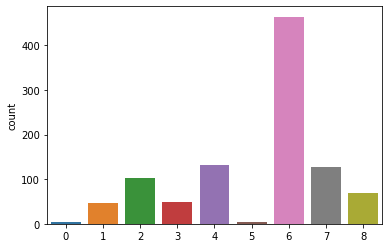

In [86]:
sns.countplot(y_train)

### XGBoost

In [87]:
xg = XGBClassifier(random_state=2020)
xg.fit(X_train, y_train)
y_train_preds = xg.predict(X_train)
y_test_preds = xg.predict(X_test)

In [88]:
print_results(y_train, y_train_preds, 'training')

training -- R2: 1.0, Accuracy Score: 1.0


In [102]:
print_results(y_test, y_test_preds, 'test')

test -- R2: 0.9944604230464128, Accuracy Score: 0.992


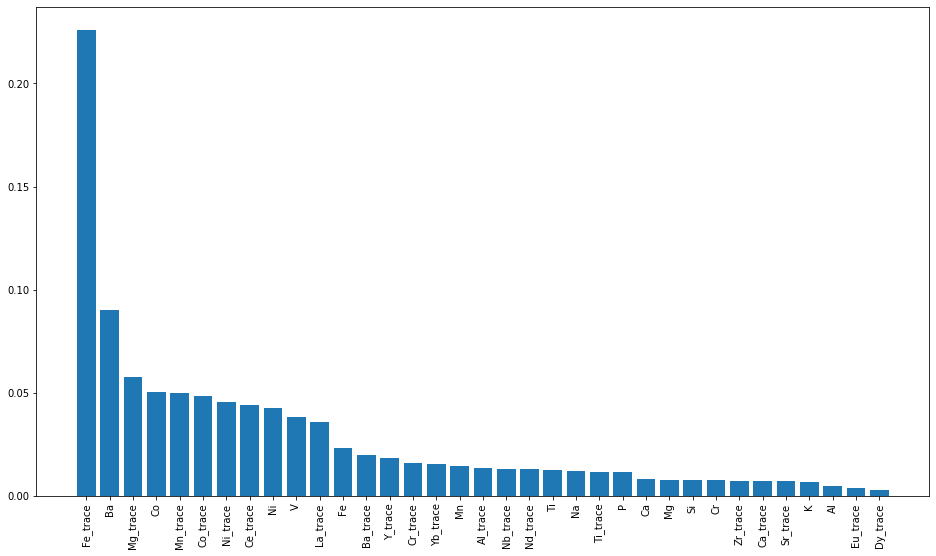

In [103]:
plot_importance(features, xg, 35)

In [105]:
# xgb = XGBClassifier(subsample=0.5, colsample_bytree=0.1, objective='multi:softmax', num_class = 9, 
#                     eval_metric = 'merror', seed=2020)

In [106]:
xgb = XGBClassifier(objective='multi:softmax', num_class = 9, 
                    eval_metric = 'merror', seed=2020)
xgb.fit(X_train, y_train)
y_train_preds = xgb.predict(X_train)
y_test_preds = xgb.predict(X_test)

In [107]:
print_results(y_train, y_train_preds, 'training')

training -- R2: 1.0, Accuracy Score: 1.0


In [108]:
print_results(y_test, y_test_preds, 'test')

test -- R2: 0.9944604230464128, Accuracy Score: 0.992


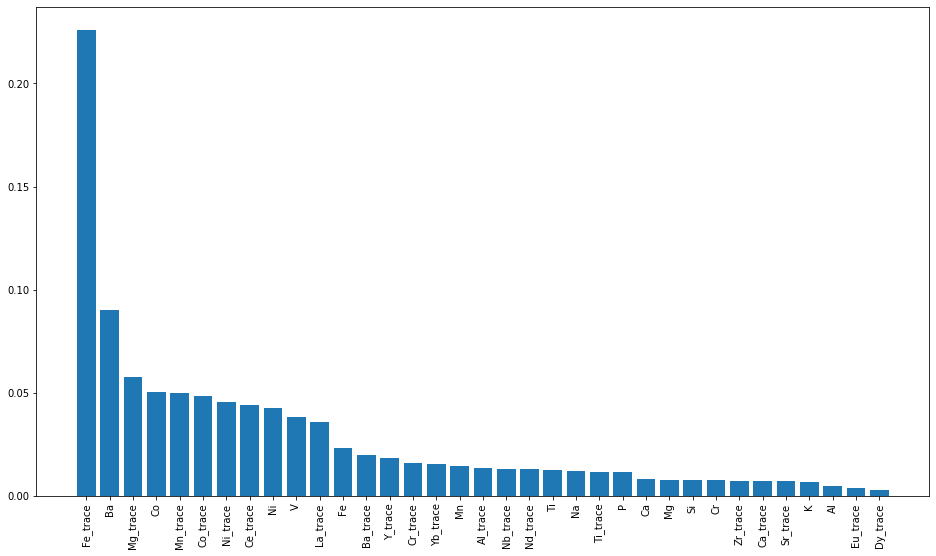

In [109]:
plot_importance(features, xgb, 35)

### Model Optimization

In [110]:
learning_rate = [0.01, 0.05, 0.1, 0.2, 1]
depth = [3, 4, 5, 6, 7]
min_split = [1, 2, 3, 4, 5]

In [111]:
# scorings = {'f1_samples': make_scorer(recall_score, average = 'samples'),
#            'f1_macro': make_scorer(f1_score, average = 'macro'),
#            'f1_weighted': make_scorer(f1_score, average = 'weighted')}

In [98]:
# scorings = {'accuracy': make_scorer(accuracy_score), 
#            'f1_samples': make_scorer(recall_score, average = 'samples'),
#            'f1_macro': make_scorer(f1_score, average = 'macro'),
#            'f1_weighted': make_scorer(f1_score, average = 'weighted')}

In [112]:
xgb = XGBClassifier(objective='multi:softmax', num_class = 9, 
                    eval_metric = 'merror', tree_method='hist', seed=2020)

In [113]:
xgb_cv = GridSearchCV(xgb, param_grid = {'eta': learning_rate, 'gamma': min_split, 'max_depth': depth}, 
                      cv=5, scoring='accuracy')
xgb_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     eval_metric='merror', gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None, num_class=9,
                                     num_parallel_tree=None,
                                     objective='multi:softmax',
                                     random_state=None, reg_alpha=None,
           

In [115]:
xgb_cv.best_params_

{'eta': 0.1, 'gamma': 1, 'max_depth': 4}

In [116]:
xgb_cv.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.1,
              eval_metric='merror', gamma=1, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.100000001,
              max_delta_step=0, max_depth=4, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_class=9, num_parallel_tree=1, objective='multi:softprob',
              random_state=2020, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=None, seed=2020, subsample=1, tree_method='hist',
              validate_parameters=1, ...)

In [117]:
xgb_cv.best_score_

0.9377236180904523

In [118]:
xgb_best = xgb_cv.best_estimator_

In [119]:
y_train_preds = xgb_best.predict(X_train)
y_test_preds = xgb_best.predict(X_test)

In [120]:
print_results(y_train, y_train_preds, 'training')

training -- R2: 0.9873494754350758, Accuracy Score: 0.9969879518072289


In [121]:
print_results(y_test, y_test_preds, 'test')

test -- R2: 0.9257696688219315, Accuracy Score: 0.98


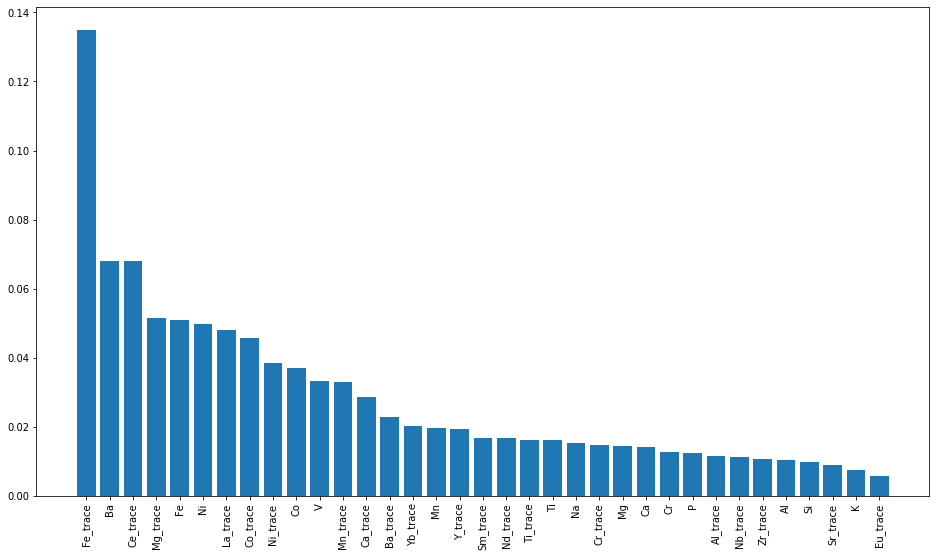

In [122]:
plot_importance(features, xgb_best, 35)

### ============ Save the best model ==================================

In [123]:
xgb_best = XGBClassifier(objective='multi:softmax', num_class = 3, 
                    eval_metric = 'merror', tree_method='hist', 
                    eta = 0.1, gamma = 1, max_depth = 4, seed=2020)
xgb_best.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.1,
              eval_metric='merror', gamma=1, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.100000001,
              max_delta_step=0, max_depth=4, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_class=3, num_parallel_tree=1, objective='multi:softprob',
              random_state=2020, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=None, seed=2020, subsample=1, tree_method='hist',
              validate_parameters=1, ...)

In [124]:
y_train_preds = xgb_best.predict(X_train)
y_test_preds = xgb_best.predict(X_test)

In [125]:
print_results(y_train, y_train_preds, 'training')

training -- R2: 0.9873494754350758, Accuracy Score: 0.9969879518072289


In [126]:
print_results(y_test, y_test_preds, 'test')

test -- R2: 0.9257696688219315, Accuracy Score: 0.98


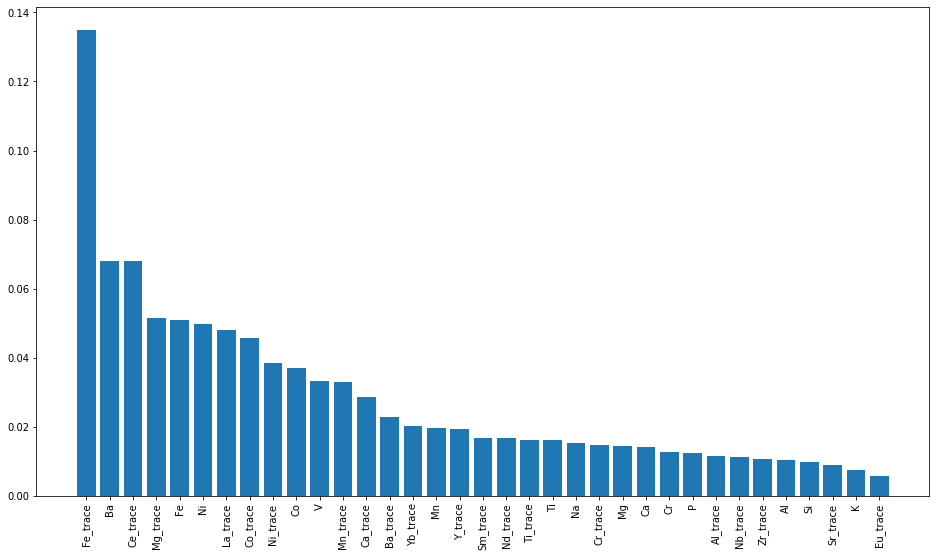

In [128]:
plot_importance(features, xgb_best, 35)

In [129]:
# with open('diamonds_xgb_gridsearchbest.pkl', 'wb') as f:
#     pickle.dump(xgb_best, f)

In [130]:
#pip install shap

In [131]:
import shap

In [132]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(xgb_best)
shap_values = explainer.shap_values(X_train)

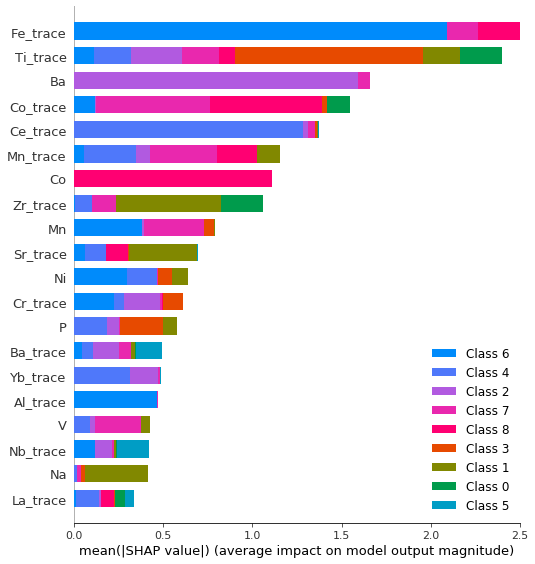

In [133]:
# take the mean absolute value of the SHAP values for 
# each feature to get a standard bar plot (produces stacked bars for multi-class outputs)
shap.summary_plot(shap_values, X_train, plot_type="bar")